In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import spectral as sp
import matplotlib.pyplot as plt
import scipy.signal as ss

# plt.rcParams['figure.figsize'] = [10, 5]
# plt.rcParams['figure.dpi'] = 100

%matplotlib inline

# Goal: Apply S-G filter and 2nd Derivative to all targets
- Check reflectance values
- Save as numpy file (.npy)

## Working paths
- Notice that our data is now composed of **header (.hdr)** files and **image (.img)** files.

In [4]:
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-Reflectance")
hdr_list = list(files_path.glob('*.hdr'))
bin_list = list(files_path.glob('*.img'))

# Create target list of header and img files
targets = list(zip(hdr_list,bin_list))

In [5]:
i = 11
targets[i][1]

WindowsPath('C:/Users/jcmontes/OneDrive - University of Tasmania/01_Projects_Drive/Imaging_spectroscopy/Phenotyping_macroalgae/data/NIWA-Antarctic-CCA/Kestrel-Reflectance/NIWA-CCA_GHN-07_2004-08-06_03-18-48_reflectance.img')

In [6]:
target_open = sp.envi.open(targets[i][0], targets[i][1])
bands = np.asarray(target_open.metadata['wavelength'])
bands = [float(i) for i in bands]

#os.chdir(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data")
#np.save('kestrel_bands', bands)

ImageView object:
  Display bands       :  (239, 173, 120)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.011069655418396]
    G: [0.0, 1.0061942338943481]
    B: [0.0, 1.0138503313064575]

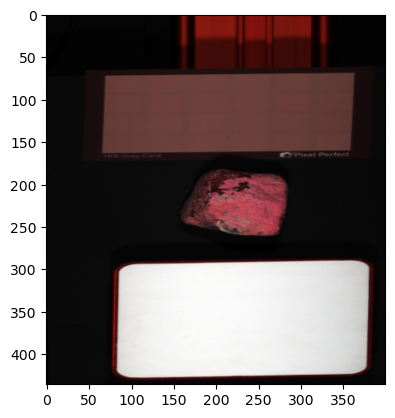

In [7]:
# Load file
target_data = target_open.load()

## Crop array
#target_data = target_data[180:350,240:690,:] ## Y1:Y2,X1:X2,All bands
sp.imshow(target_data,(239,173,120))

In [44]:
#t = 0.0 #threshold for shadows
#target_data = (target_data > t) * target_data

## Spectral Binning

In [45]:
## Spectral resolution = 1.68 nm
#print(float(bands_vector[11]) - float(bands_vector[10]))
## To increase signal-to-noise ratio we will bin the spectral dimension to 5 nm

#bands = np.asarray(bands_vector)

In [46]:
#bands.reshape(-1,4).mean(axis=1)
#bands[:(bands.size // 3) * 3].reshape(-1, 3).mean(axis=1).round(2)

## Savitzky-Golay
- Window size: 20
- Polyorder: 3

In [47]:
## Full array
target_sg = ss.savgol_filter(target_data, 3, 1, axis=2)

#os.chdir(r"C:\Users\jcmontes\Desktop")
#sp.envi.save_image(hdr_list[i].stem +'_SG.hdr', target_sg, interleave='bil', metadata=target_open.metadata)

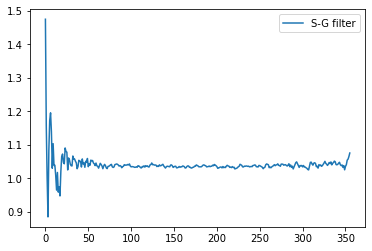

In [48]:
## Selecting one pixel for plotting and comparisons
#my_pixel = target_data[400, 500,:].flatten()
#plt.plot(my_pixel, label='No filter')
plt.plot(target_sg[400, 500,:], label='S-G filter')
plt.legend()

## 2nd Derivative

In [15]:
## Full array
target_sg_d2 = ss.savgol_filter(target_data, 35, 5, axis=2, deriv=2)


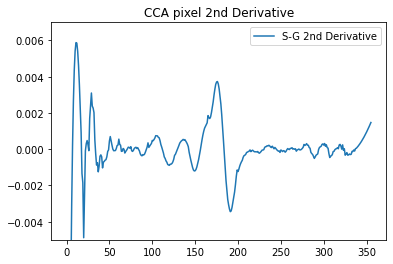

In [17]:
#plt.plot(target_sg_d1[50,200,:], label = "S-G 1st Derivative")
plt.plot(target_sg_d2[500,410,:], label = "S-G 2nd Derivative")
plt.ylim(-0.005,0.007)
plt.title("CCA pixel 2nd Derivative")
plt.legend()

### End of notebook
- Output: Filtered reflectance images and 1st derivatives as numpy arrays
- Python script used for batch processing:
    - loop_SavitzkyGolay2ndDerivative.py
- Saved outputs as .npy files in:
    - data\Savitzky-Golay
    - data\SecondDerivative

In [ ]:
# K means unfiltered
(m,c) = sp.kmeans(sg_filtered,5,10)
plt.imshow(m,cmap = 'nipy_spectral')

In [ ]:
for i in range(c.shape[0]):
    plt.plot(c[i,:])
    plt.xlim(0,400)
plt.legend()

In [ ]:
## Output
hdr_reflectance = pathlib.Path(hdr_rad.stem.replace('GG','reflectance'))

sp.envi.save_image(filespath.parents[0] / hdr_reflectance.with_suffix('.hdr'), img_reflectance)